Elijah Burns <br/>
Phys 434 <br/>
Lab 4

In [24]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

In [17]:
hf = h5py.File('gammaray_lab4.h5', 'r')
hf.keys()
data = np.array(hf.get('data'))
data[:,0]

array([9.40680016e+08, 3.15000000e+02, 4.50000000e+01, 1.00000000e+01])

In [12]:
hf.close()

**Problem 1
In this problem we are looking at the data from a gamma-ray satellite orbiting in low Earth orbit. It takes a reading of the number of particles detected every 100 milliseconds, and is in an approximately 90 minute orbit. While it is looking for gamma-ray bursts, virtually all of the particles detected are background cosmic rays.**

**As with most data, there are 'features.' Your lab instructor has helpfully incorporated the meta-data into your data file.**

**1) Down load the data from the course website (gammaray_lab4.h5), and import it into your working environment. The data has 4 columns and more than 25 million rows. The columns are time (in gps seconds), Solar phase (deg) showing the position of the sun relative to the orbit, Earth longitude (deg) giving the position of the spacecraft relative to the ground, and particle counts. Make a few plots, generally exploring your data and making sure you understand it. Give a high level description of the data features you see. Specifically comment on whether you see signal contamination in your data, and how you plan to build a background pdf().**

**2) The background is not consistent across the dataset. Find and describe as accurately as you can how the background changes.**

**3) Create a model for the background that includes time dependence, and explicitly compare your model to the data. How good is your model of the background?**

**4) Because the background varies, your discovery sensitivity threshold (how many particles you would need to see) also varies. What is the '5-sigma' threshold for a 100 millisecond GRB at different times?**

**Optional: while this is simulated data, it is based on a real effect seen by low Earth orbit satellites. Can you identify the cause of the variable background and propose a physical model?**

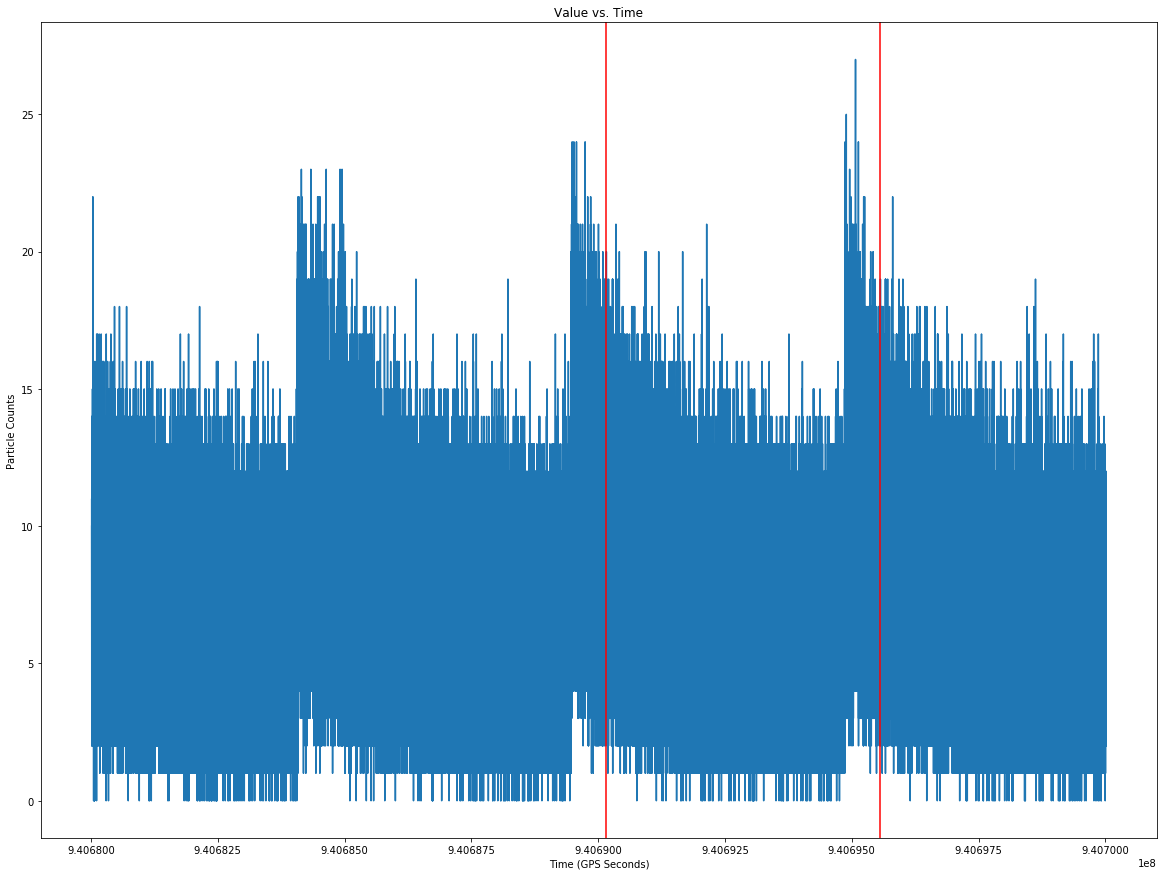

In [48]:
#Problem 1 Part 1
plt.plot(data[0,0:199999],data[3,0:199999])
plt.ylabel('Particle Counts')
plt.xlabel('Time (GPS Seconds)')
plt.title('Value vs. Time')
plt.axvline(-9850+9.407e8, color = 'r')
plt.axvline(-4450+9.407e8, color = 'r')
plt.show()

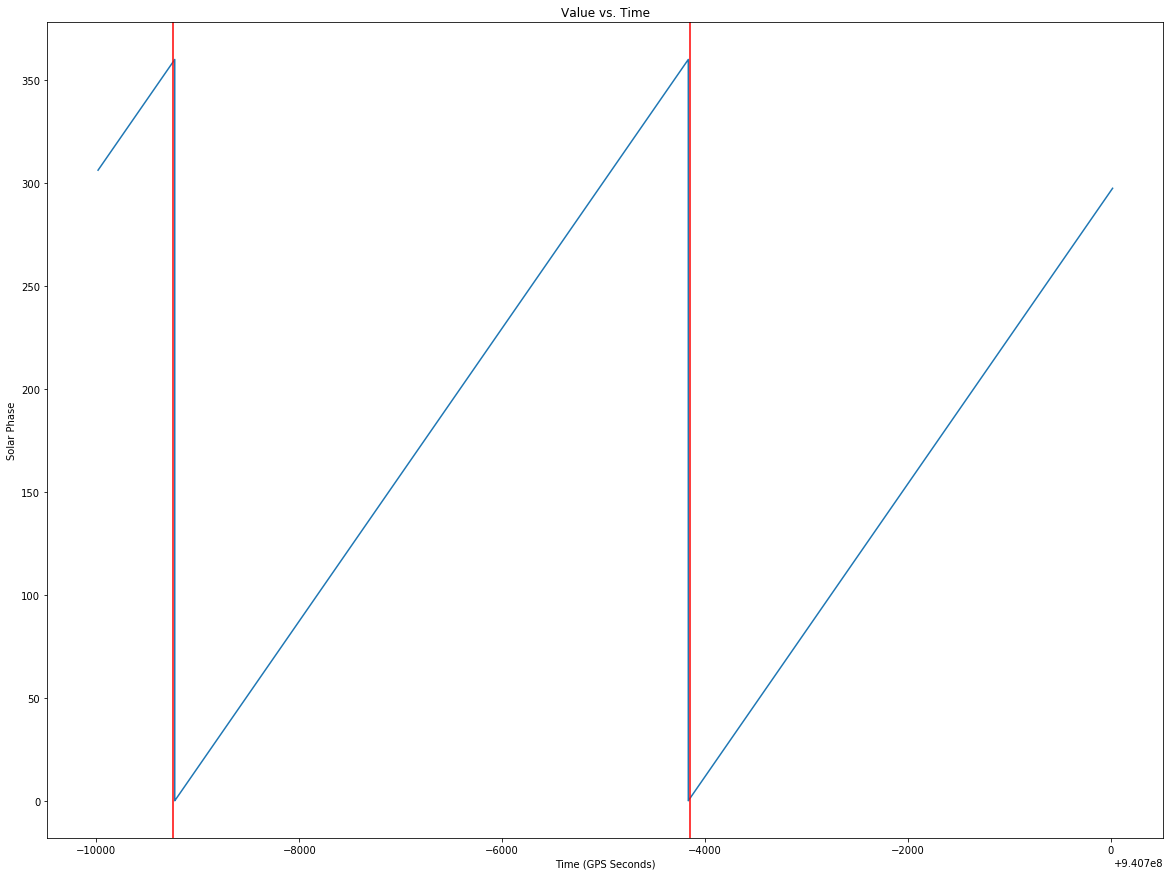

In [49]:
plt.plot(data[0,100000:199999],data[1,100000:199999])
plt.ylabel('Solar Phase')
plt.xlabel('Time (GPS Seconds)')
plt.title('Value vs. Time')
plt.axvline(-9250+9.407e8, color = 'r')
plt.axvline(-4150+9.407e8, color = 'r')
plt.show()

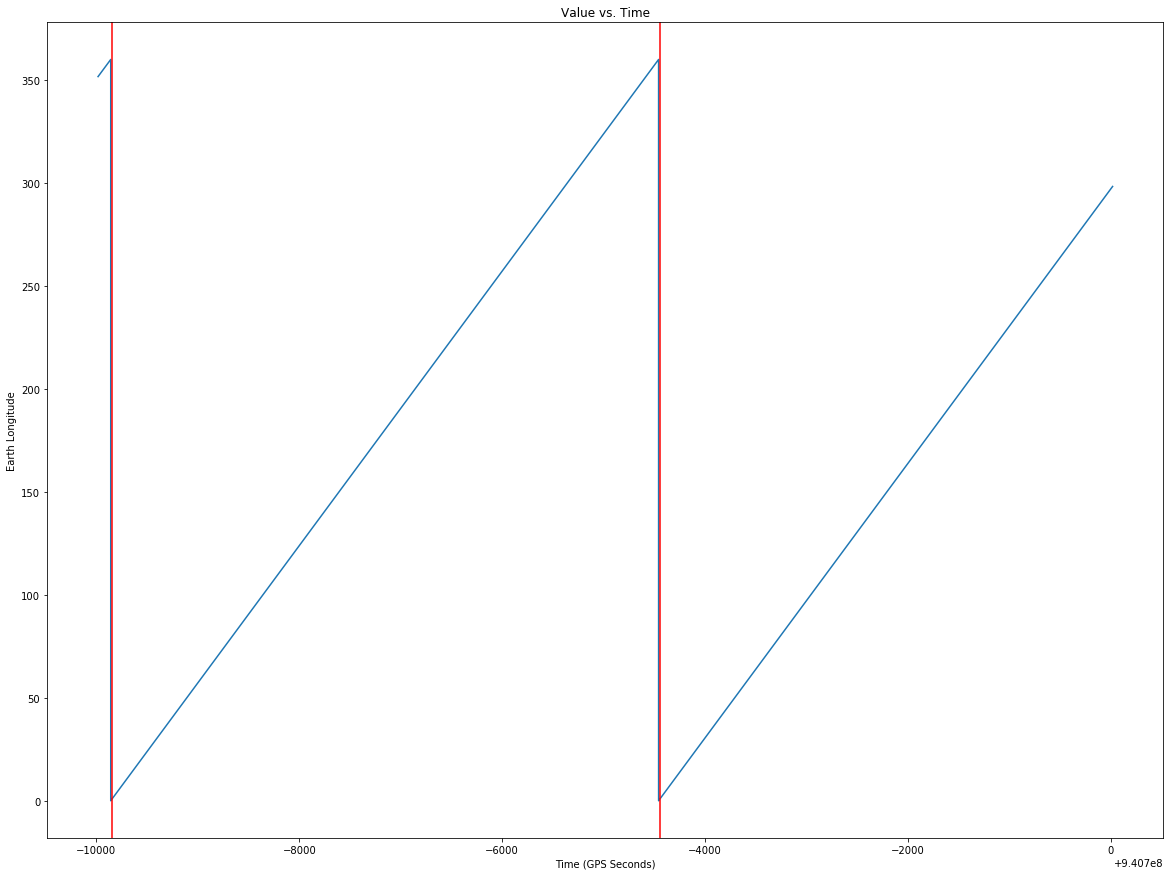

In [55]:
plt.plot(data[0,100000:199999],data[2,100000:199999])
plt.ylabel('Earth Longitude')
plt.xlabel('Time (GPS Seconds)')
plt.title('Value vs. Time')
plt.axvline(-9850+9.407e8, color = 'r')
plt.axvline(-4450+9.407e8, color = 'r')
plt.show()

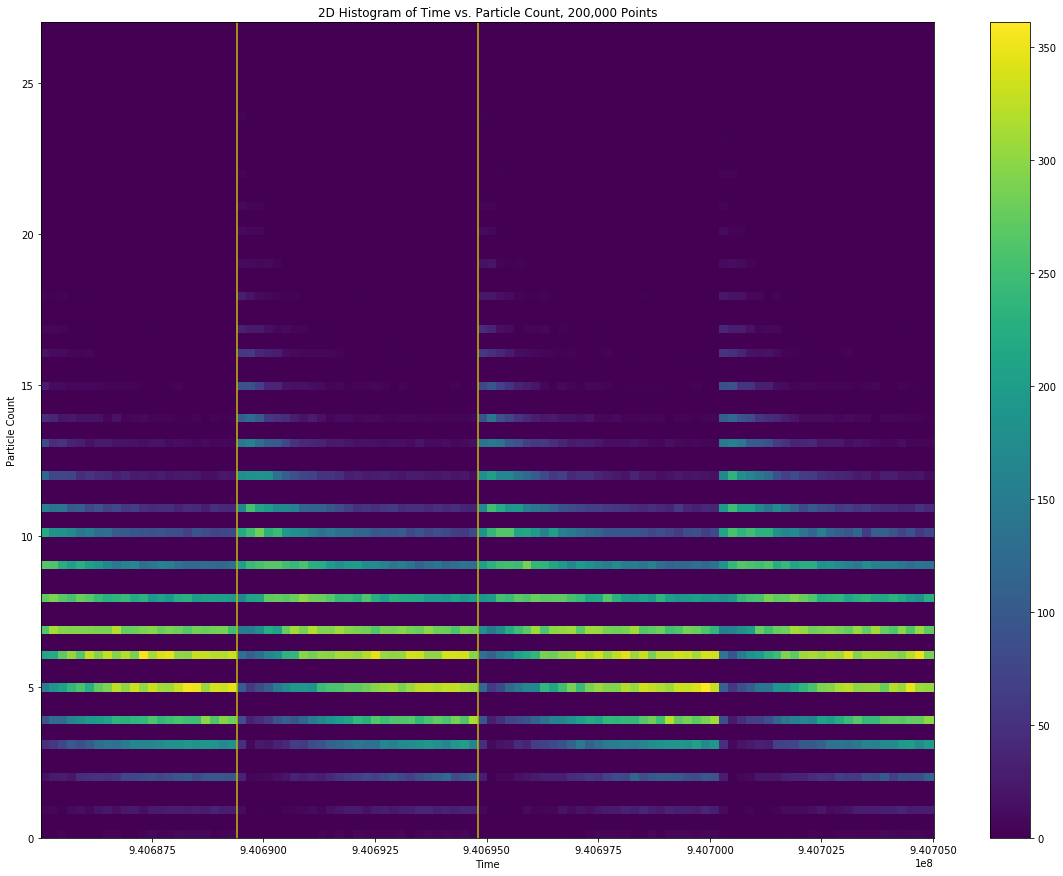

In [90]:
plt.hist2d(data[0,50000:250000],data[3,50000:250000],bins=(100,100))
plt.colorbar()
plt.xlabel('Time')
plt.ylabel('Particle Count')
plt.title('2D Histogram of Time vs. Particle Count, 200,000 Points')
plt.axvline(9.406894e8, color = 'y')
plt.axvline(9.406948e8, color = 'y')
plt.show()

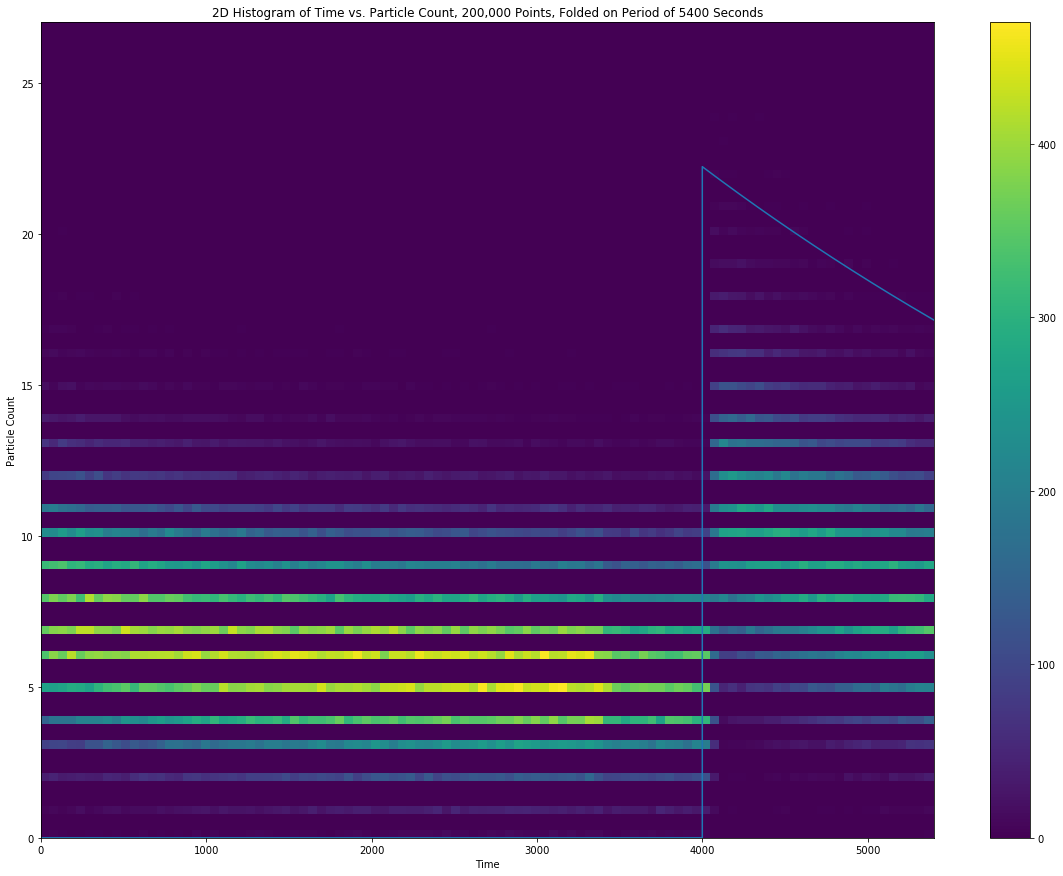

In [114]:
tnew = data[0,:]%5400
x = np.linspace(0,5400,250000)
plt.hist2d(tnew[0:250000],data[3,0:250000],bins=(100,100))
plt.colorbar()
plt.xlabel('Time')
plt.ylabel('Particle Count')
plt.title('2D Histogram of Time vs. Particle Count, 200,000 Points, Folded on Period of 5400 Seconds')
plt.axvline(9.406894e8, color = 'y')
plt.axvline(9.406948e8, color = 'y')
y = stats.expon.pdf(x,loc=4000,scale=5400)
plt.plot(x,y*120000)
plt.show()

Problem 1, Part 1 Answer: <br/> 
In the above plots there are some notable features. In the time vs. solar phase and time vs. Earth longitude we see that the data is periodic, and starts from 0 degrees, increases linearly with time until it reaches 360 degrees, and then resets to 0 degrees again. In the time vs. particle count plots we notice the distribution of the data is also periodic, with a period of roughly 5400 seconds, or 90 minutes as shown in the folded data plot just above, which folds over a period of 5400 seconds. 
<br/>
<br/>
There is some signal contamination in the scatterplot of the time vs. particle count data because there is so much data being plotted, it all kind of blurs together and it is hard to identify the period of the data and the density of the data points, so it is hard to distinguish what the distribution is. When you plot the data in a 2D histogram, it is easier to see the boundaries of where the data starts to repeat itself, in other words it is easier to determine the period of the data. <br/>
<br/>
To build the background pdf() we know that almost all the particles detected are background cosmic rays. We also know that the sun and the moon block these cosmic rays, so they won't be detected in those regions of the orbit, which could explain why the number of particles counted decreases with time during a single period. If the sun and the moon were blocking specific parts of the orbit of the detector, that would explain why there is a sudden jump in the number of particles detected at the boundary of each period, because the detector suddenly exits a region where cosmic rays are being blocked, and enters a region where more cosmic rays appear. 

Problem 1, Part 2 Answer: <br/>
To see how the background changes with time it will be helpful to examine the 2D histogram of 200,000 points, and the 2D histogram of the folded data with a period of 5400 seconds. At the beginning of a period, the background starts with particle counts as high as 20, and then the counts decrease during the 90 minute orbital period. The particle counts reach a minimum of about 0 at the end of the orbital period. When a new orbital period starts, the number of particles counted immediately jumps back up, and starts to decrease again as time increases. Due to this sudden jump, and then decrease of particles counted across the time period, the background this most closely resembles would be an exponential distribution.

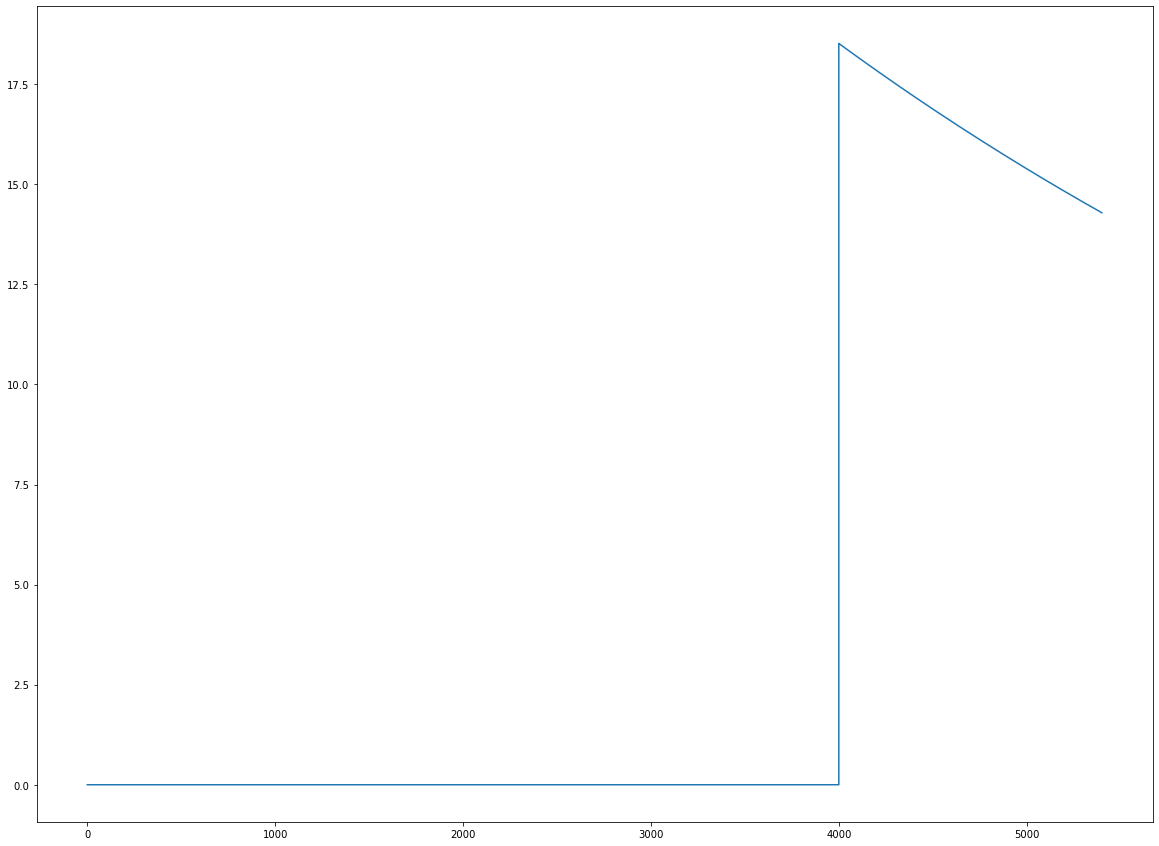

In [112]:
#Problem 1, Part 3
#Modeling time dependent exponential background
y = stats.expon.pdf(x, loc=4000, scale = 5400)
plt.hist2d(tnew[0:250000],data[3,0:250000],bins=(100,100))
plt.colorbar()
plt.xlabel('Time')
plt.ylabel('Particle Count')
plt.title('2D Histogram of Time vs. Particle Count, 200,000 Points, Folded on Period of 5400 Seconds')
plt.axvline(9.406894e8, color = 'y')
plt.axvline(9.406948e8, color = 'y')
y = stats.expon.pdf(x,loc=4000,scale=5400)
plt.plot(x,y*120000)
plt.show()
plt.show()

**Problem 2
In this problem we are going to look at a stack of telescope images (again simulated). We have 10 images, but you and your lab partner will be looking for different signals. One of you will be looking for the faintest stars, while the other will be looking for a transient (something like a super novae that only appears in one image). Flip a coin to determine which of you is pursuing which question.**

**1) Dowload the data from images.h5. This is a stack of 10 square images, each 200 pixels on a side.**

**2) Explore the data. Is there signal contamination? Is the background time dependent? Is it consistent spatially? Develop a plan to calculate your background pdf().**

**3) Using your background distribution, hunt for your signal (either faint stars, or a transient). Describe what you find.**

**4) You and your lab partner had different pdf(), but were using the same data. Explore why this is.**

As Elijah, I am looking at faintest stars